# Imports

In [1]:
import tarfile
import os
import cv2
import imghdr
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


C:\Users\Kush\AppData\Local\Temp\ipykernel_12012\2424506307.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = r"C:\Users\Kush\MineD\data\test"
categories = ['BG', 'FACS', 'Macroscopy', 'Microscopy']


In [3]:
data_info = []

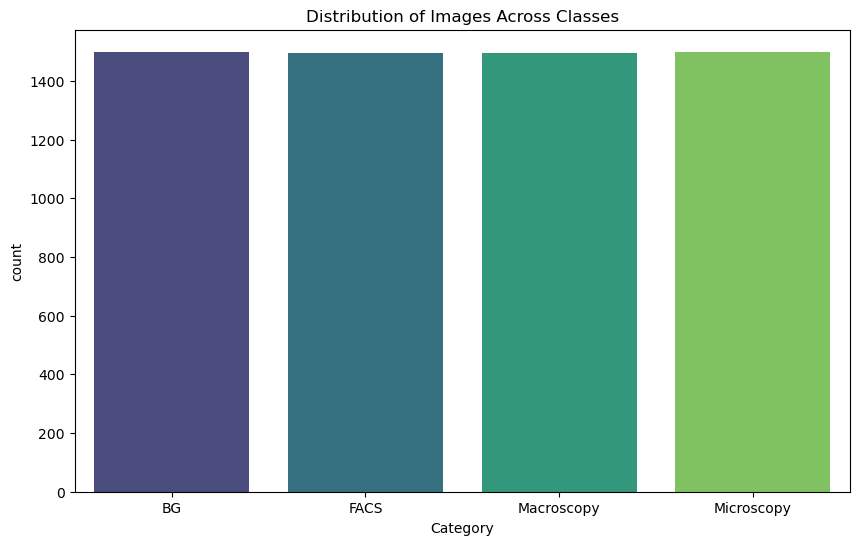

In [9]:
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path)
            width, height = image.size
            data_info.append([category, file_name, width, height])


df = pd.DataFrame(data_info, columns=['Category', 'File_Name', 'Width', 'Height'])
# Plot Distribution of Images Across Classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Distribution of Images Across Classes')
plt.show()


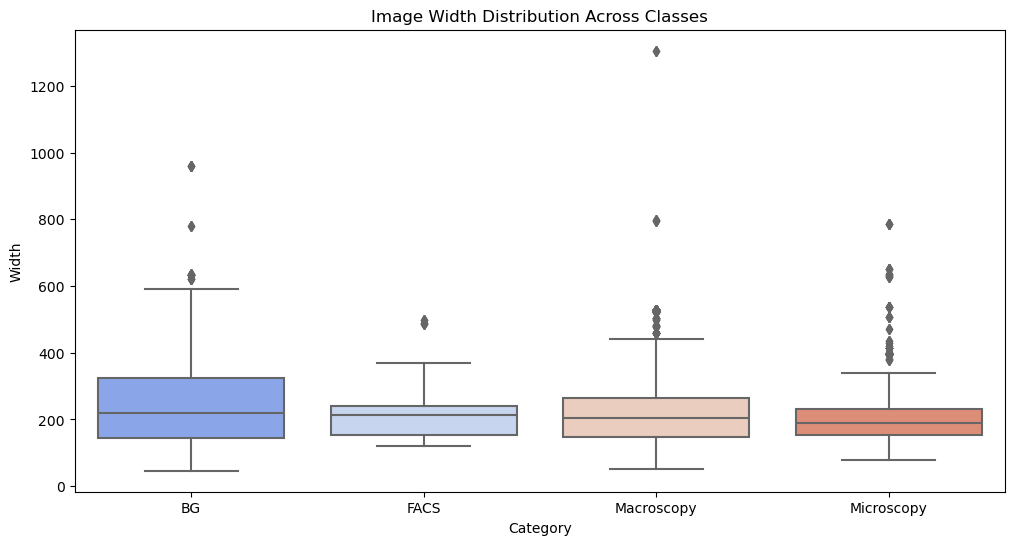

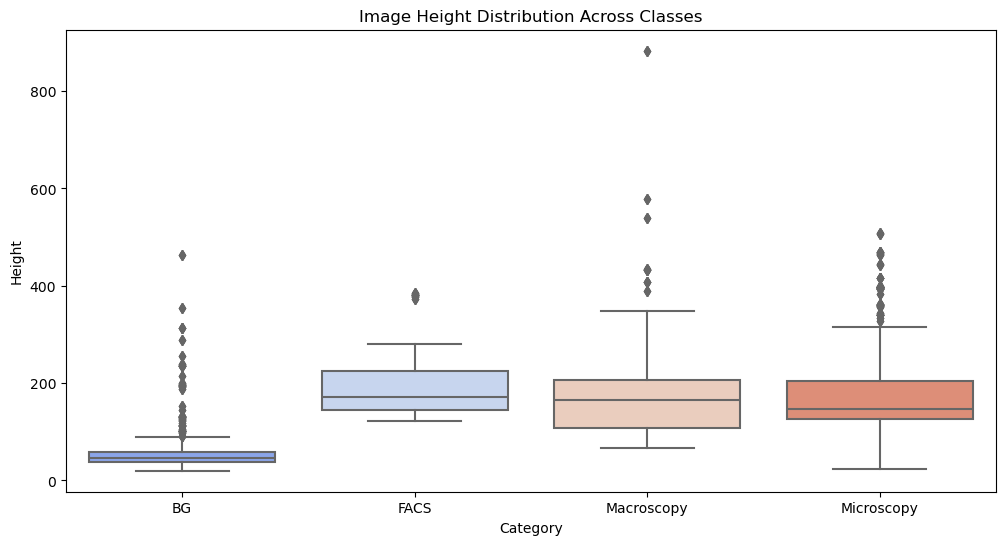

In [11]:
# Plot Image Dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Width', data=df, palette='coolwarm')
plt.title('Image Width Distribution Across Classes')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Height', data=df, palette='coolwarm')
plt.title('Image Height Distribution Across Classes')
plt.show()


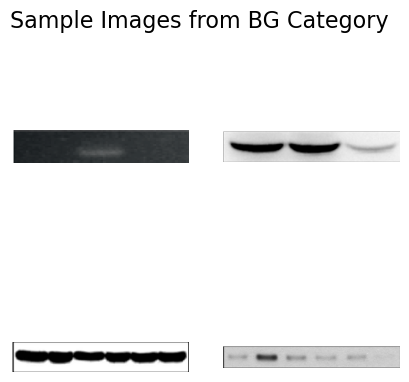

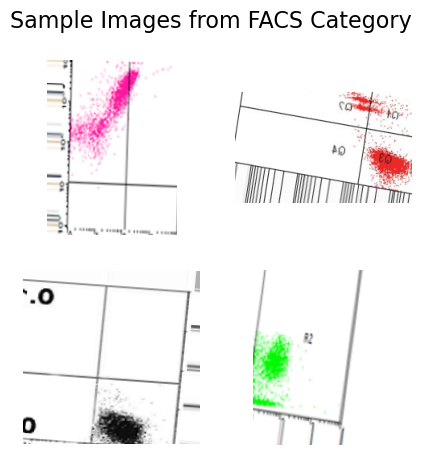

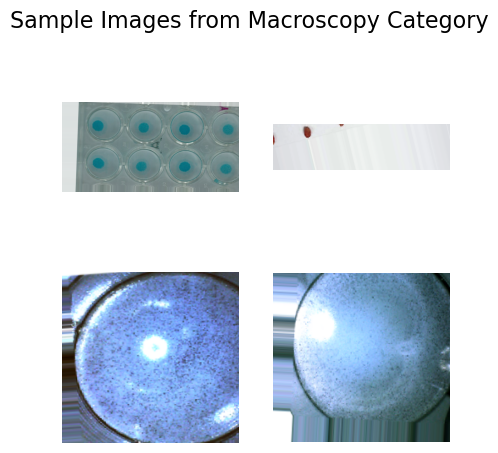

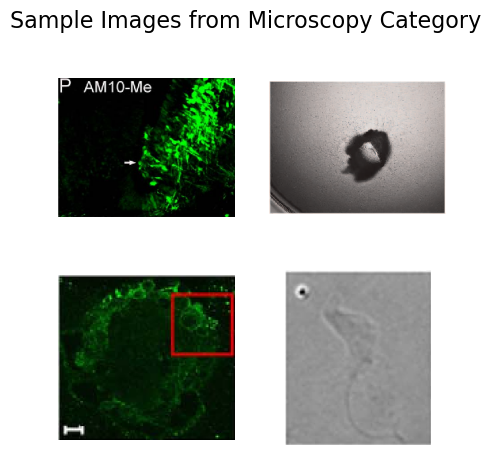

In [15]:
for category in categories:
    folder_path = os.path.join(data_dir, category)
    plt.figure(figsize=(5, 5))
    plt.suptitle(f'Sample Images from {category} Category', fontsize=16)
    
    sample_images = random.sample(os.listdir(folder_path), 4)
    
    for i, file_name in enumerate(sample_images):
        file_path = os.path.join(folder_path, file_name)
        img = io.imread(file_path)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
    
    plt.show()



In [16]:
# Basic Statistics
print("Basic Statistics of Image Width and Height per Category:")
print(df.groupby('Category').agg({'Width': ['mean', 'std'], 'Height': ['mean', 'std']}))

Basic Statistics of Image Width and Height per Category:
                 Width                  Height           
                  mean         std        mean        std
Category                                                 
BG          253.294000  142.568461   57.686000  46.528127
FACS        201.010020   62.387636  185.126253  47.139876
Macroscopy  236.695391  147.279894  175.987976  76.405493
Microscopy  208.474000   98.045816  176.074000  83.031757


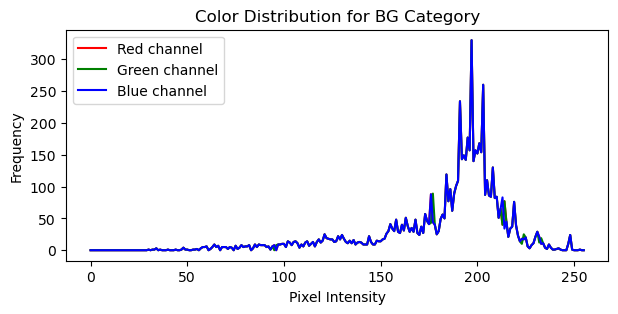

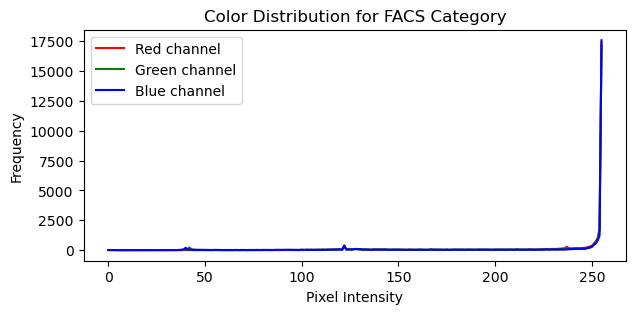

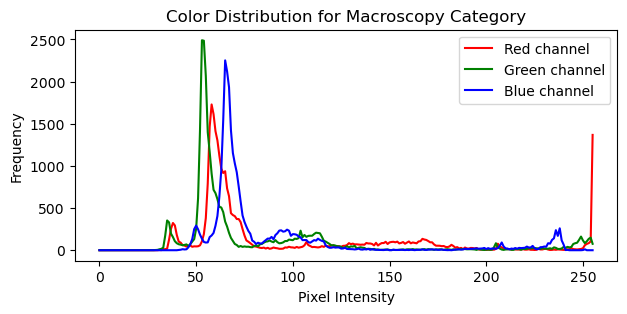

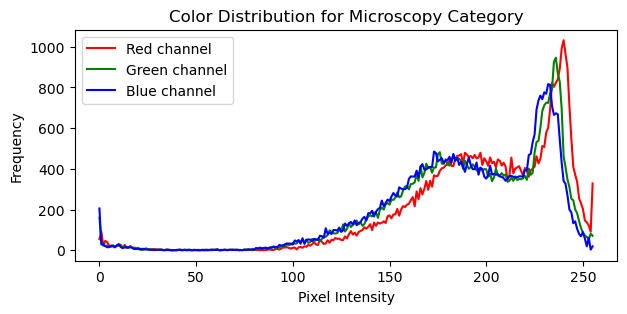

In [19]:
# Color Distribution Analysis
def plot_color_distribution(image_path, title):
    image = io.imread(image_path)
    plt.figure(figsize=(7, 3))
    
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        histo, _ = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        plt.plot(histo, color=color.lower(), label=f'{color} channel')
    
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


for category in categories:
    folder_path = os.path.join(data_dir, category)
    sample_image = random.choice(os.listdir(folder_path))
    sample_image_path = os.path.join(folder_path, sample_image)
    plot_color_distribution(sample_image_path, f'Color Distribution for {category} Category')


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
from sklearn import metrics
from sklearn.tree import plot_tree, export_text
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models



In [32]:
name = []
accuracy = []
precision = []
recall = []
f1 = []

In [7]:
#### For DL ####

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_dataset = datasets.ImageFolder(root='data/test', transform=data_transforms)

dataloader = DataLoader(image_dataset, batch_size=32, shuffle=True)


In [8]:
train_loader = DataLoader(image_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)


# CNN

In [9]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
num_classes = 4
model = SimpleCNN(num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")



Epoch 1/5, Loss: 1.0290
Epoch 2/5, Loss: 0.3561
Epoch 3/5, Loss: 0.1964
Epoch 4/5, Loss: 0.1646
Epoch 5/5, Loss: 0.1092


In [17]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accracy_cnn = correct / total
print(f"Validation Accuracy: {accracy_cnn:.4f}")

Validation Accuracy: 0.9750


In [33]:
name.append("CNN")
accuracy.append(accracy_cnn)

# EfficientNet

In [21]:
model = models.efficientnet_b3(weights='DEFAULT')

In [22]:
num_classes = 4
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

In [23]:
train_loader = DataLoader(image_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(image_dataset, batch_size=16, shuffle=False)


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [27]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 0.2558
Epoch 2/10, Loss: 0.1397
Epoch 3/10, Loss: 0.1008
Epoch 4/10, Loss: 0.0706
Epoch 5/10, Loss: 0.0577
Epoch 6/10, Loss: 0.0453
Epoch 7/10, Loss: 0.0266
Epoch 8/10, Loss: 0.0425
Epoch 9/10, Loss: 0.0180
Epoch 10/10, Loss: 0.0453


In [37]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_en = correct / total
print(f"Validation Accuracy: {accuracy_en:.4f}")


Validation Accuracy: 0.9940


In [39]:
name.append("EfficientNetB3")
accuracy.append(accuracy_en)

# ResNet

In [43]:
model = models.resnet50(weights='DEFAULT')

In [44]:
num_classes = 4
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
train_loader = DataLoader(image_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

In [47]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [48]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/10, Loss: 0.2604
Epoch 2/10, Loss: 0.1928
Epoch 3/10, Loss: 0.1602
Epoch 4/10, Loss: 0.1268
Epoch 5/10, Loss: 0.0716
Epoch 6/10, Loss: 0.0670
Epoch 7/10, Loss: 0.0651
Epoch 8/10, Loss: 0.0743
Epoch 9/10, Loss: 0.0575
Epoch 10/10, Loss: 0.0430


In [49]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_rn = correct / total
print(f"Validation Accuracy: {accuracy_rn:.4f}")

Validation Accuracy: 0.9965


In [50]:
name.append("ResNet")
accuracy.append(accuracy_rn)

In [58]:
print(name)
print(accuracy)

['CNN', 'EfficientNetB3', 'ResNet']
[0.974974974974975, 0.993993993993994, 0.9964964964964965]


In [52]:
def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    # Apply the transformations
    image = data_transforms(image)
    # Add a batch dimension
    image = image.unsqueeze(0)
    return image


In [56]:
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    image = image.to(device) 
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    
    return predicted.item()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#image of macroscopy class
image_path = r"C:\Users\Kush\Downloads\images.jpeg"
predicted_class = predict_image(image_path, model)
print(f"Predicted class: {predicted_class}")


Predicted class: 2


In [57]:
class_idx_to_label = {0: 'BG', 1: 'FACS', 2: 'Macroscopy', 3: 'Microscopy'}

predicted_label = class_idx_to_label[predicted_class]
print(f"Predicted Label: {predicted_label}")


Predicted Label: Macroscopy
